# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from scipy import stats
import pandas as pd
import seaborn as sns


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [ ]:
import random
# used in class: np.random.randint(1, 7, size = 10)

def dice_rolls():
  rand_dice_roll = random.choices(range(1, 7), k = 10)
  return rand_dice_roll

dr = pd.DataFrame(dice_rolls())
dr = dr.rename(columns = {0: "Dice_number"})
dr

#### 2.- Plot the results sorted by value.

In [3]:
sorted_dr = dr.sort_values(by = "Dice_number")
sorted_dr
# hope the question is asking to order (ASC) by the value, and not by the order of the roll

,Dice_number
3,1
1,2
5,3
8,3
4,4
6,4
9,4
0,5
2,6
7,6


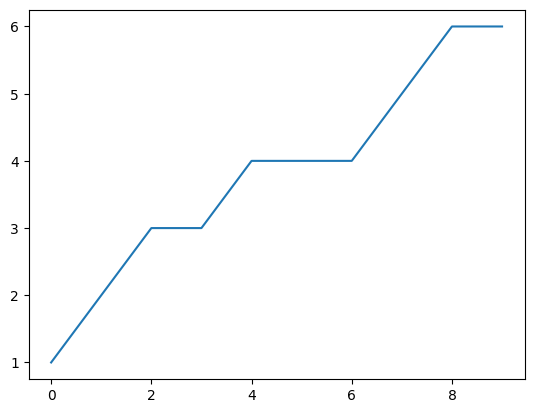

In [4]:
plt.plot(sorted_dr["Dice_number"].values)
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

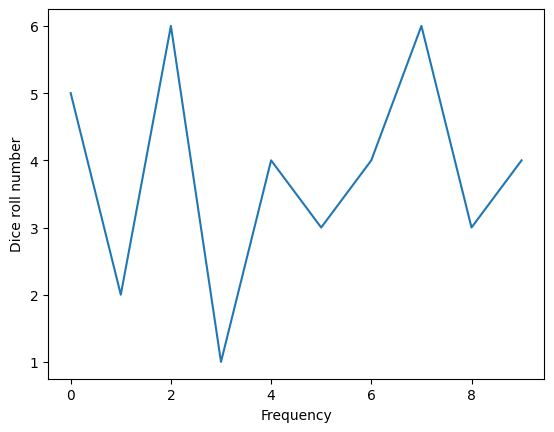

In [5]:
plt.plot(dr["Dice_number"].values)
plt.xlabel("Frequency")
plt.ylabel("Dice roll number")
plt.show()

In [ ]:
#Not sure about this one, but still:
""" The difference between the two plots (even with the same dataset) relies on the sorted func.
The first plot illustrates the ordered sequence of dice numbers, while the second plot shows the actual individual observations in their original random way.
Maybe in this case (and in luck/bad luck games) we see there is no pattern what so ever"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles.

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value.

In [6]:
# Just checking
round(dr.mean())

Dice_number    4.0
dtype: float64

In [7]:
def manual_mean():
  total_sum = 0
  total_count = 0
  for value in dr["Dice_number"]:
    total_sum += value
    total_count += 1

  mean = total_sum/total_count
  return mean

round(manual_mean())

4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value.

In [8]:
freq = {}
for value in dr["Dice_number"]:
    if value in freq:
        freq[value] += 1
    else:
        freq[value] = 1
#print("Frequency is: ", freq)

sum_values = 0
total_count = 0

for value, count in freq.items():
  sum_values += value * count
  total_count += count
mean = sum_values/total_count
round(mean)

4

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value.
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [ ]:
sorted_dr = dr.sort_values(by = "Dice_number")
sorted_dr

In [10]:
def manual_median(sorted_dr):
  total_count = 0
  for value in sorted_dr:
    total_count += 1
    if total_count % 2 == 0:
      median = (sorted_dr[total_count // 2 - 1] + sorted_dr[total_count // 2]) / 2
    else:
      median = (sorted_dr[total_count // 2])

  return median

print((manual_median(sorted_dr["Dice_number"])))
# wrong, and brain melting :)

3.5


In [11]:
sorted_dr_array = sorted_dr.values
def manual_median(sorted_dr_array):
  median = (sorted_dr_array[4] + sorted_dr_array[5])/2
  return median
manual_median(sorted_dr_array)

array([4.])

In [12]:
print("Manual median is: ", (sorted_dr_array[4] + sorted_dr_array[5])/2)
print("Method median is:", np.median(sorted_dr))
# because dice have integers, i think this should be rounded

Manual median is:  [4.]
Method median is: 4.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles.

In [13]:
def manual_quartiles(sorted_dr_array):
    q2 = manual_median(sorted_dr_array)
    for_q1 = sorted_dr_array[:6]
    for_q3 = sorted_dr_array[:6:]
    q1 = manual_median(for_q1)
    q3 = manual_median(for_q3)
    return q1, q3

manual_quartiles(sorted_dr_array)
# died. so easy and wrong, but died.

(array([4.]), array([4.]))

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [15]:
data = pd.read_csv("/content/roll_the_dice_hundred.csv")
data.head()
#data.shape

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


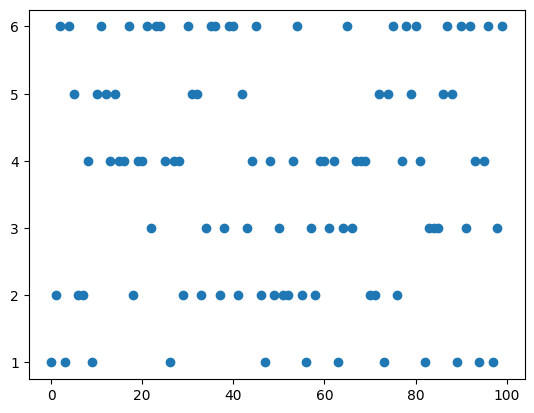

In [16]:
sorted_data = data.sort_values(by = "value")
data_plot = plt.scatter( x = sorted_data["roll"], y = sorted_data["value"])
data_plot

In [ ]:

"""The distribution of observations throughout 100 rolls: I would expect a uniform distribution of values for frequency.
But somehow it looks that odd numbers occur a litlle less than even :/ But still, looks just like a pretty random set, just like a expected roll dice"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
def manual_mean():
  total_sum = 0
  total_count = 0
  for value in data["value"]:
    total_sum += value
    total_count += 1

  mean = total_sum/total_count
  return mean

round(manual_mean())

4

#### 3.- Now, calculate the frequency distribution.


In [18]:
freq = {}
for value in data["value"]:
    if value in freq:
        freq[value] += 1
    else:
        freq[value] = 1
print("Frequency is: ", freq)

Frequency is:  {1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram?

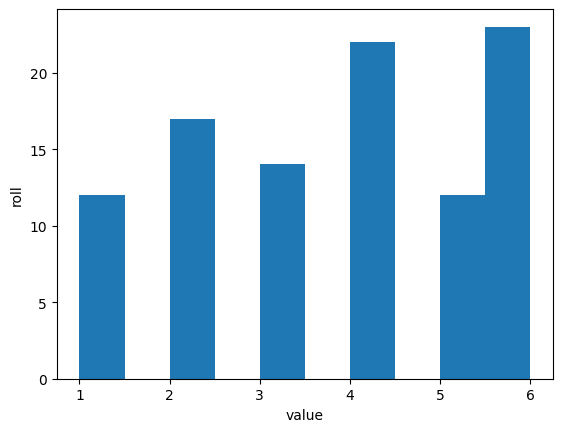

In [19]:
plt.hist(data["value"])
plt.xlabel("value")
plt.ylabel("roll")
plt.show()

In [ ]:
""" Because the mean will be the most observed event, it makes sense that the bar corresponding to 4 (it's the mean as well) will be the one with > frequency."""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

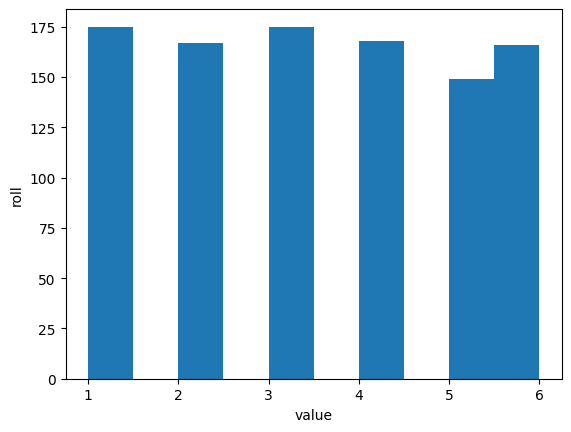

In [21]:
data_2 = pd.read_csv("/content/roll_the_dice_thousand.csv")

plt.hist(data_2["value"])
plt.xlabel("value")
plt.ylabel("roll")
plt.show()

In [ ]:
"""A think because now we have a larger dataset, the frequency distribution will behave more evenly and more consistently. Also, this provides more~
confidence in the "random" of the dice, instead of looking like some bias in some numbers."""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot.

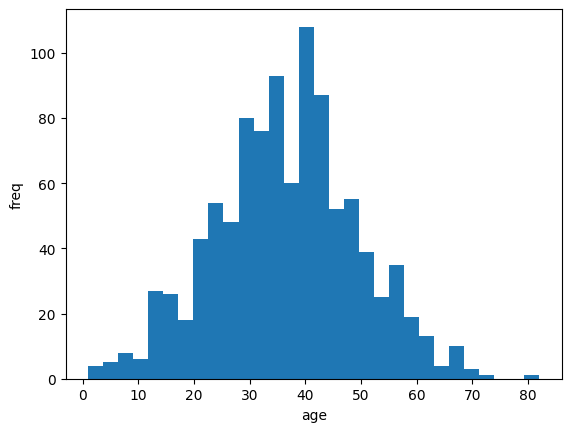

In [22]:
ages_pop = pd.read_csv("/content/ages_population.csv")
plt.hist(ages_pop["observation"], bins = 30)
plt.xlabel("age")
plt.ylabel("freq")
plt.show()
# mean around 40 years old
# std around 14

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [23]:
print("Mean is: ", ages_pop["observation"].mean())
print("Std is: ",ages_pop["observation"].std())

Mean is:  36.56
Std is:  12.81649962597677


In [ ]:
"""I think i got wrong in mean because of a "litlle skeweness" and it might have led to an overestimation of the mean. """

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

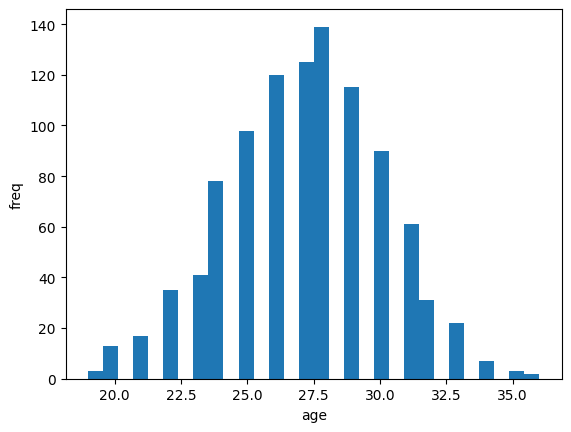

In [24]:
ages_pop_2 = pd.read_csv("/content/ages_population2.csv")
plt.hist(ages_pop_2["observation"], bins = 30)
plt.xlabel("age")
plt.ylabel("freq")
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""Very different, even according to the range of ages (suggesting less variability). Now we will have a lower mean age,
 so the central tendency of this dataset is lower than the one before. """

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [25]:
print("Mean is: ", ages_pop_2["observation"].mean())
print("Std is: ",ages_pop_2["observation"].std())

Mean is:  27.155
Std is:  2.9698139326891835


In [ ]:
""" The mean age of  27.155 indicates that the central tendency of the dataset is lower than that of the previous dataset.
Also suggests a younger population compared to the first dataset.

A really lower std of around 2.97 indicates that the ages in this dataset are more tightly clustered around the mean.
The previous set had a bigger range -> where the values were more spread out."""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

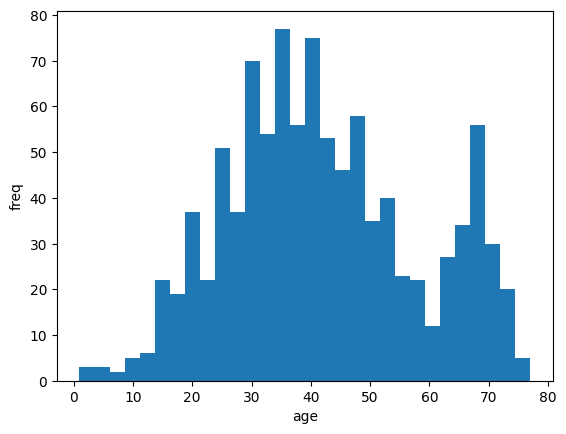

In [26]:
ages_pop_3 = pd.read_csv("/content/ages_population3.csv")
plt.hist(ages_pop_3["observation"], bins = 30)
plt.xlabel("age")
plt.ylabel("freq")
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [27]:
print("Mean is: ", ages_pop_3["observation"].mean())
print("Std is: ",ages_pop_3["observation"].std())

Mean is:  41.989
Std is:  16.14470595986593


In [ ]:
""" Now with a mean age of 41.989, this indicates indicates that the central tendency of this dataset is more similar with the one in Step 1.
And also sugests a similar population as in Step 1.

With a std of  16.144, this surelly puts us in a population with the age range really similar to step 1, a dataset not so tightly clustered around the mean.
Now we have values more spread out."""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [28]:
q1 = np.quantile(ages_pop_3, 0.25)
q2 = np.quantile(ages_pop_3, 0.50)
q3 = np.quantile(ages_pop_3, 0.75)
q4 = np.quantile(ages_pop_3, 1)

print("the first quartile is: ", q1)
print("the second quartile is: ", q2)
print("the third quartile is: ", q3)
print("the fourth quartile is: ", q4)
# the median and mean are really similar, not equal, probably because of some outliers/skewness - lot of observations between q3 and q4

the first quartile is:  30.0
the second quartile is:  40.0
the third quartile is:  53.0
the fourth quartile is:  77.0


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
p10 = np.quantile(ages_pop_3, 0.10)
p15 = np.quantile(ages_pop_3, 0.15)
p85 = np.quantile(ages_pop_3, 0.85)
p90 = np.quantile(ages_pop_3, 0.90)


print("The percentile 10 is: ", p10)
print("The percentile 15 is: ", p15)
print("The percentile 85 is: ", p85)
print("The percentile 90 is: ", p90)



In [ ]:
""" maybe if we had younger ages in p10 and p15, we could get a sample with a younger mean.
p10 is 22 years away from the mean, as for p90 is 27 years away, pushing the mean value a litlle up """

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""